In [1]:
from IPython.display import HTML, IFrame, Image

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import datashader as ds
from scipy import stats
%matplotlib inline


from matplotlib import rcParams, cm
rcParams['grid.linewidth'] = 0

# Visualizing Big Datasets: Tools, Pitfalls, Experimental Example

### Importance of Data Visualization - NYC Taxi pick-upp data

<img src="./images/nyc_pickups_vs_dropoffs.jpg"  width="900" height="900"/>

# Plotting very large datasets meaningfully

<img src="./images/nyc_pickups_vs_dropoffs.jpg"  width="600" height="600"/>



- to provide clear understanding
- to aid decision making 

### We can always look at statistics, but with big dataset visualization can get a good feeling!

When working with large datasets, visualizations are often the only way available to understand the properties of that dataset -- there are simply too many data points to examine each one!  Thus it is very important to be aware of some common plotting problems that are minor inconveniences with small datasets but very serious problems with larger ones.

<img src="./images/6-blind-men-hans.jpg"  width="1100" height="1100"/>

## Visualization Bias: Same Data, Different Visualization
<img src="./images/chart_comb.png"  width="1000" height="1000"/>

<img src="./images/chart_comb2.png"  width="1000" height="1000"/>

# Problems?

# Presentation Outine:
- Tools introduction
- Ratcave VR Acuity introduction
- Pitfalls of Large Datasets Vizualization with Real Data Example

# Tools

![Image](./images/pandas.png)

Python Library providing high-performance data manipulation and analysis tool using powerful data structures

- DataFrame objects, with customazed and default indexing 
- Loading data into in-memory data object
- Data alignment and handling of missing data.
- Reshaping, operations on columns
- Group by data, mergeging and joining of data
- Time Series functionality.

In [2]:
import pandas as pd

### Creating structured dataset

In [3]:
data = pd.DataFrame(np.random.randn(500,3), columns=['X','Y','Z'])
data.X

0      1.808085
1      1.490385
2      0.510929
3      0.944991
4      0.777754
5      0.422678
6      0.300780
7     -1.998330
8      0.514624
9     -1.113017
10    -0.903638
11     1.279106
12    -0.819799
13     1.064255
14     0.562739
15     1.712992
16    -1.504305
17    -0.879722
18    -1.680548
19    -0.015081
20    -2.307391
21    -0.913656
22     0.681504
23     0.477494
24     0.892757
25     0.554324
26     0.159832
27     1.396583
28    -1.418314
29     0.500154
         ...   
470   -1.948276
471   -0.379835
472    1.247762
473   -1.403217
474   -1.165582
475   -1.065766
476   -0.699673
477    0.106531
478    1.093905
479   -0.108374
480    0.224425
481    2.356189
482    0.126895
483    0.642919
484    0.936990
485    1.235465
486   -2.028755
487    0.085880
488    0.896301
489    0.113997
490   -1.037223
491   -0.698664
492    1.344444
493    0.314571
494    0.293893
495   -1.201341
496   -0.250860
497   -0.056239
498    0.414272
499    1.701477
Name: X, Length: 500, dt

###  Operations on columns

In [4]:
data.X = data.X * 20
data.head()

,X,Y,Z
0,36.161702,-1.740463,0.885734
1,29.807691,0.021512,0.753757
2,10.218586,-1.384039,0.630366
3,18.899820,0.639768,-1.267955
4,15.555073,1.476963,-0.391452


### Adding new column: label

In [6]:
x = np.array([[1,2,3,4,5]])
data['label'] = np.repeat(x, 100)

data.tail()

,X,Y,Z,label
495,-24.026816,0.265912,0.097537,5
496,-5.017195,-0.336051,-0.167327,5
497,-1.124788,-0.822809,-0.063875,5
498,8.285449,-0.617917,-2.117112,5
499,34.029532,-0.987966,1.009134,5


### Describing statistics of the data

In [7]:
data.describe()

,X,Y,Z,label
count,500.000000,500.000000,500.000000,500.00000
mean,-0.936988,0.019121,-0.028489,3.00000
std,20.048652,0.990445,0.956995,1.41563
min,-64.148179,-3.351394,-2.897370,1.00000
25%,-16.120606,-0.634122,-0.686471,2.00000
50%,-0.451229,-0.022978,-0.010567,3.00000
75%,13.023123,0.659025,0.613264,4.00000
max,60.279126,2.735953,3.018006,5.00000


<img src='./images/seaborn.png'  width="1000" height="1000"/>

Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

- Visualizing univariate and bivariate distributions and comparing them between subsets of data
- Tools that fit and visualize linear regression models
- Functions that visualize matrices of data
- Several built-in themes for styling matplotlib graphics
- Tools for choosing color palettes - to reveal patterns in your data

In [8]:
import seaborn as sns

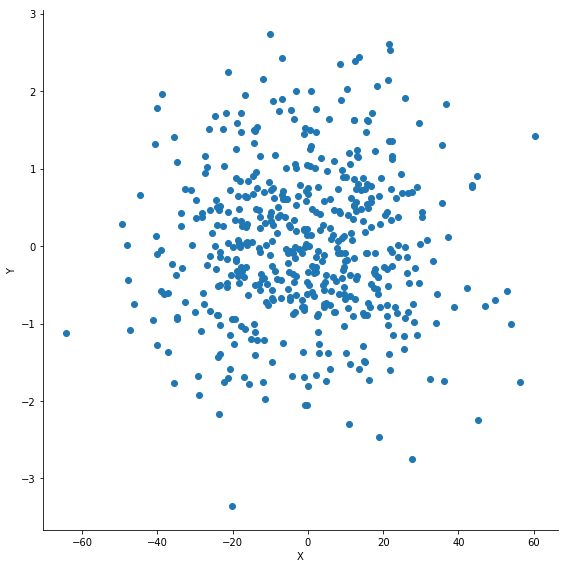

In [9]:
g = sns.FacetGrid(data=data, size=8);
g.map(plt.scatter, 'X', 'Y');

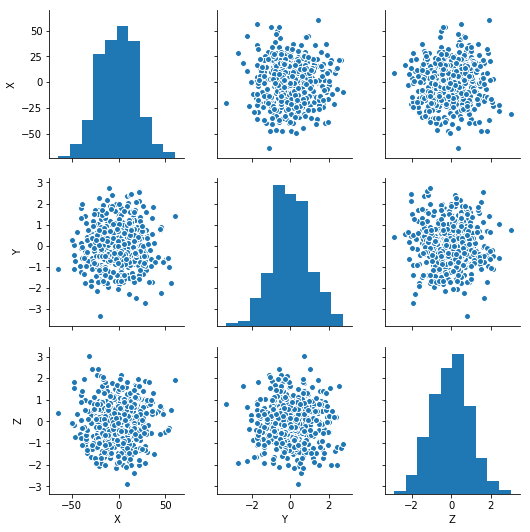

In [10]:
sns.pairplot(data=data, vars=['X', 'Y', 'Z'] );

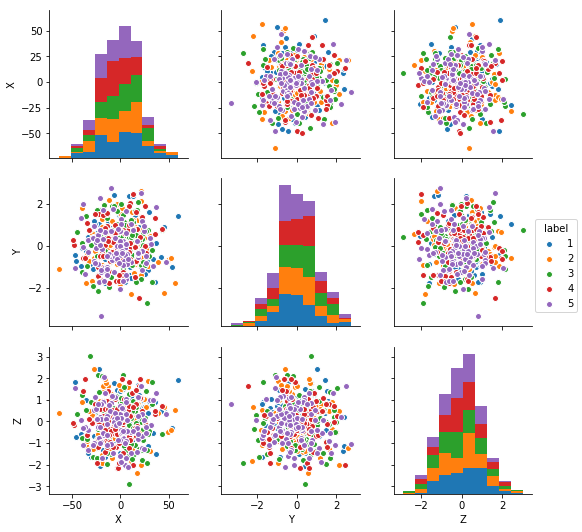

In [11]:
## Adding hue
sns.pairplot(data=data, vars=['X', 'Y', 'Z'], hue='label');

<img src='./images/datashader.png'  width="700" height="700"/>

# Datashader
Datashader is a Python library for analyzing and visualizing large datasets. Designed to **"rasterize"** or **"aggregate"** datasets into regular grids that can be viewed as images. 
Datashader breaks the creation of images of data into 3 main steps:

1. Projection - Each record is projected into zero or more bins of a  grid shape.

2. Aggregation - Reductions are computed for each bin, compressing the potentially large dataset into a much smaller aggregate array.

3. Transformation - These aggregates are then further processed, eventually creating an image.


<img src="./images/index.jpeg"  width="700" height="700"/> 
<img src="./images/python-graph-gallery1-609.jpg"  width="1000" height="1000"/>
https://python-graph-gallery.com/

# Experiment

## Ratcave
<img src='./images/ratcave.png'  width="900" height="900" align="center"/>

## Ratcave Virtual Reality: Acuity Measurment Project
<img src='./images/rat1.gif'  width="900" height="900" align="center"/>

# Dataset explenation: position and orientation 
<img src='./images/position.png'  width="400" height="500" align="center"/>
<img src="./images/spherical_coordinates.png"  width="500" height="500" align="center"/>

## What are we looking for: Stimuli Related Behavior
<img src='./images/ratSRB.gif'  width="900" height="900" align="center"/>

# Pitfalls of Large Datasets Vizualization

## Loading The Dataset
Another feature of pandas in practice. 

In [12]:
path = 'data/'
dfrat = pd.read_hdf(path+'relationalDatabase.h5', 'Rat_Behavior').set_index('index')
dfrat.describe()


,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id
count,1.280662e+06,1.280662e+06,1.280662e+06,1.280662e+06,1.280662e+06,1.280662e+06,1.280662e+06,1.280662e+06,1.280662e+06
mean,9.073073e+04,3.780447e+02,4.171135e-03,1.126962e-01,-1.757355e-02,-1.764554e-02,-1.764985e-01,-5.330155e-02,3.427937e+00
std,5.483929e+04,2.284971e+02,5.472566e-02,5.773475e-02,5.453772e-02,5.957492e-01,4.486547e-01,6.399129e-01,2.165823e+00
min,0.000000e+00,0.000000e+00,-9.420275e-02,4.327843e-02,-9.999978e-02,-9.999981e-01,-9.999986e-01,-9.999998e-01,0.000000e+00
25%,4.533000e+04,1.888750e+02,-4.663273e-02,7.851390e-02,-6.850875e-02,-5.427750e-01,-5.608227e-01,-6.578161e-01,2.000000e+00
50%,8.876300e+04,3.698459e+02,8.407816e-04,9.655091e-02,-2.171306e-02,-2.256700e-02,-1.453605e-01,-7.001106e-02,3.000000e+00
75%,1.312200e+05,5.467500e+02,5.410460e-02,1.157454e-01,3.207740e-02,5.280534e-01,1.285384e-01,5.372806e-01,5.000000e+00
max,2.452310e+05,1.021796e+03,1.274465e-01,2.999993e-01,8.559266e-02,9.999951e-01,9.761727e-01,9.999952e-01,7.000000e+00


In [13]:
dfrat.describe()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id
count,1.280662e+06,1.280662e+06,1.280662e+06,1.280662e+06,1.280662e+06,1.280662e+06,1.280662e+06,1.280662e+06,1.280662e+06
mean,9.073073e+04,3.780447e+02,4.171135e-03,1.126962e-01,-1.757355e-02,-1.764554e-02,-1.764985e-01,-5.330155e-02,3.427937e+00
std,5.483929e+04,2.284971e+02,5.472566e-02,5.773475e-02,5.453772e-02,5.957492e-01,4.486547e-01,6.399129e-01,2.165823e+00
min,0.000000e+00,0.000000e+00,-9.420275e-02,4.327843e-02,-9.999978e-02,-9.999981e-01,-9.999986e-01,-9.999998e-01,0.000000e+00
25%,4.533000e+04,1.888750e+02,-4.663273e-02,7.851390e-02,-6.850875e-02,-5.427750e-01,-5.608227e-01,-6.578161e-01,2.000000e+00
50%,8.876300e+04,3.698459e+02,8.407816e-04,9.655091e-02,-2.171306e-02,-2.256700e-02,-1.453605e-01,-7.001106e-02,3.000000e+00
75%,1.312200e+05,5.467500e+02,5.410460e-02,1.157454e-01,3.207740e-02,5.280534e-01,1.285384e-01,5.372806e-01,5.000000e+00
max,2.452310e+05,1.021796e+03,1.274465e-01,2.999993e-01,8.559266e-02,9.999951e-01,9.761727e-01,9.999952e-01,7.000000e+00


## Taking the subsection - for the sake of plotting speed

In [14]:
mask = dfrat.session_id == 0
rat = dfrat[mask]
rat.head()
rat.tail()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id
index,,,,,,,,,
159380,159380,664.083376,-0.017551,0.186103,0.046540,0.241129,-0.198757,0.949922,0
159381,159381,664.087542,-0.017141,0.184863,0.046914,0.254070,-0.211804,0.943710,0
159382,159382,664.091709,-0.016698,0.183512,0.047313,0.265572,-0.226651,0.937070,0
159383,159383,664.095876,-0.016304,0.182186,0.047606,0.275242,-0.246051,0.929355,0
159384,159384,664.100042,-0.015926,0.180857,0.048112,0.286543,-0.259080,0.922372,0


In [15]:
mask2 = (dfrat.session_id == 1) | (dfrat.session_id == 2)
rat2 = dfrat[mask2]

rat2.tail(2)

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id
index,,,,,,,,,
188299,188299,784.579217,0.024437,0.107252,0.035597,0.295940,0.152368,0.942976,2
188300,188300,784.583383,0.024471,0.107232,0.035564,0.296564,0.147740,0.943516,2


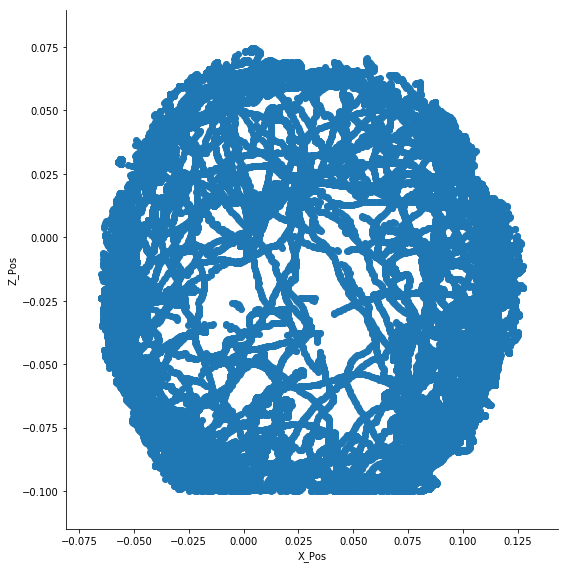

In [16]:
g = sns.FacetGrid(data=rat, size=8)
g.map(plt.scatter,'X_Pos','Z_Pos');

## 1. Overplotting 

- 2 x 2D subsets - two separate experiments, plotted togheter

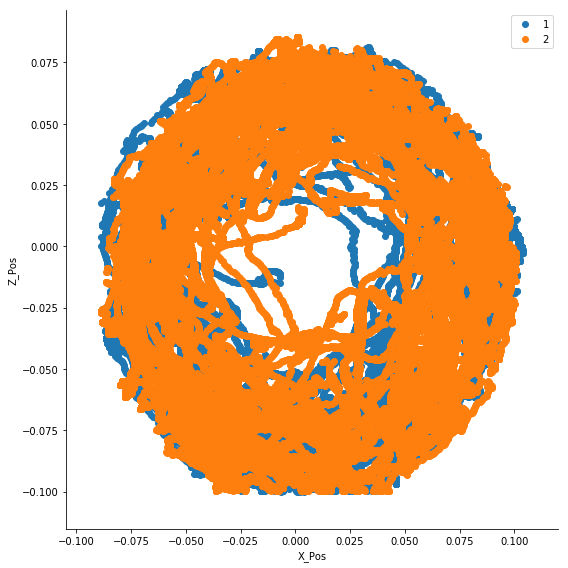

In [17]:
g = sns.FacetGrid(data=rat2, size=8, hue='session_id')
g.map(plt.scatter,'X_Pos','Z_Pos');
plt.legend();

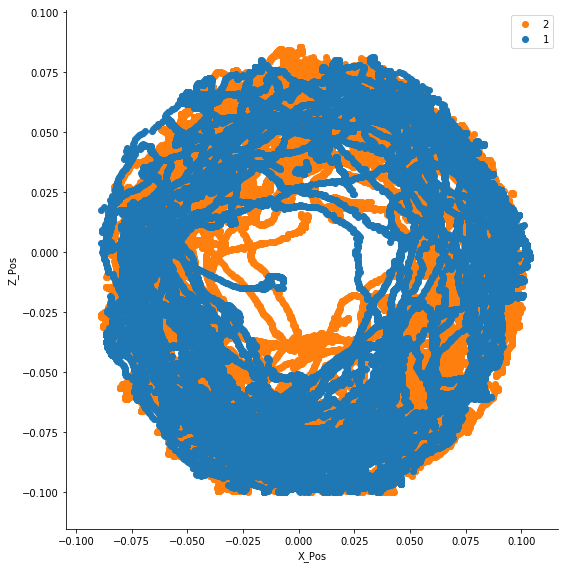

In [18]:
g = sns.FacetGrid(data=rat2, size=8, hue='session_id', hue_order=[2,1], palette=["C1", "C0"] )
g.map(plt.scatter,'X_Pos','Z_Pos');
plt.legend();

## Apperance depeneds on which one is plotted first!
### Occlusion of Data - points plotted on top of one another

# Alpha Parameter

Reduce the problem of overplotting by using the transparency parameter.

If we set **alpha=0.1** we need ten points for the color too saturate 

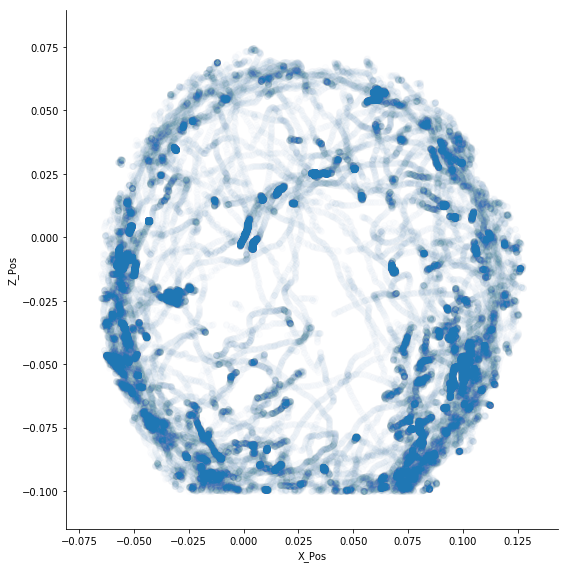

In [19]:
g = sns.FacetGrid(data=rat, size=8)
g.map(plt.scatter,'X_Pos','Z_Pos', alpha=0.01);

# 2. Oversaturation 
+ reduced the effect of points overlap
- but it is now harder to see the individual points 
- we can still see the oversaturation problem, in every point where 


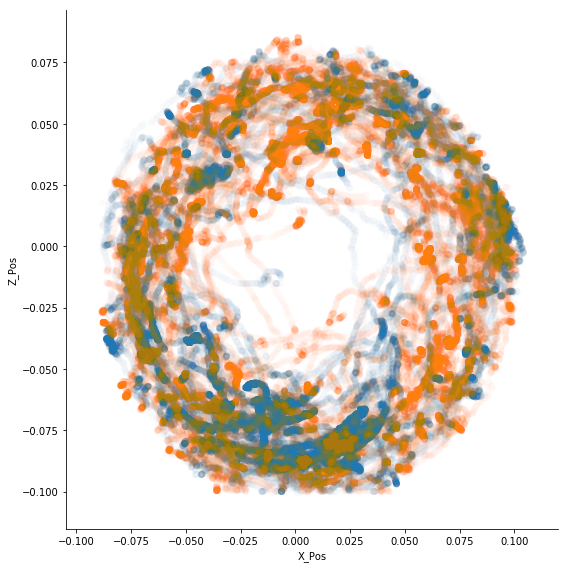

In [20]:
g = sns.FacetGrid(data=rat2, size=8, hue='session_id' )
g.map(plt.scatter,'X_Pos','Z_Pos', alpha=0.01);

## What else can we do?
## Add another Hyperparameter:  point size 

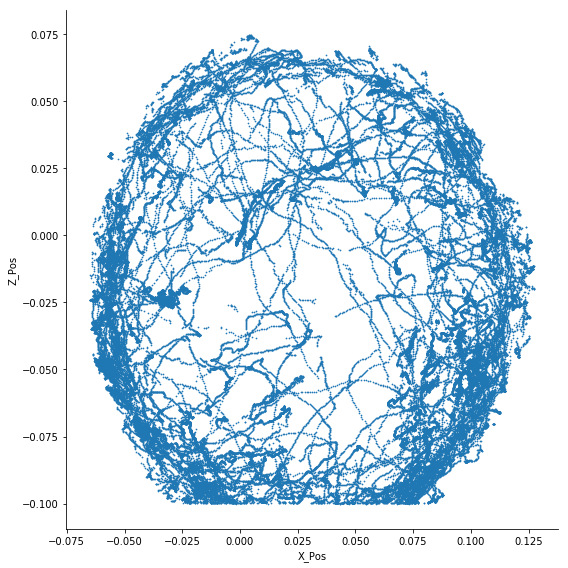

In [21]:
g = sns.FacetGrid(data=rat, size=8)
g.map(plt.scatter,'X_Pos','Z_Pos', s=0.5);

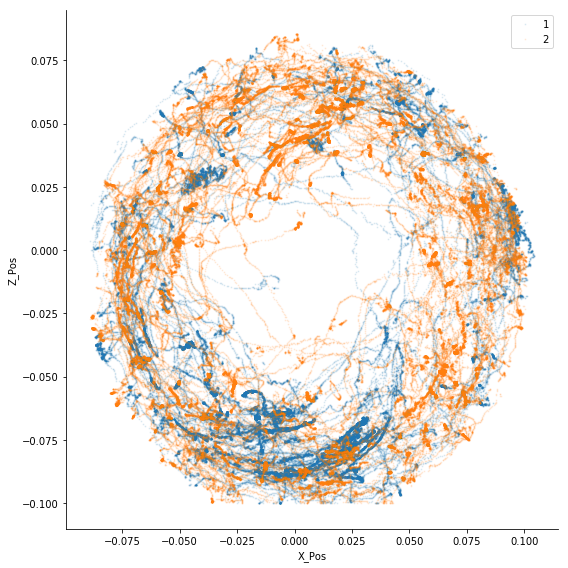

In [22]:
g = sns.FacetGrid(data=rat2, size=8, hue='session_id')
g.map(plt.scatter,'X_Pos','Z_Pos', s=0.9, alpha=0.1);
plt.legend();

## We can take part of the dataset

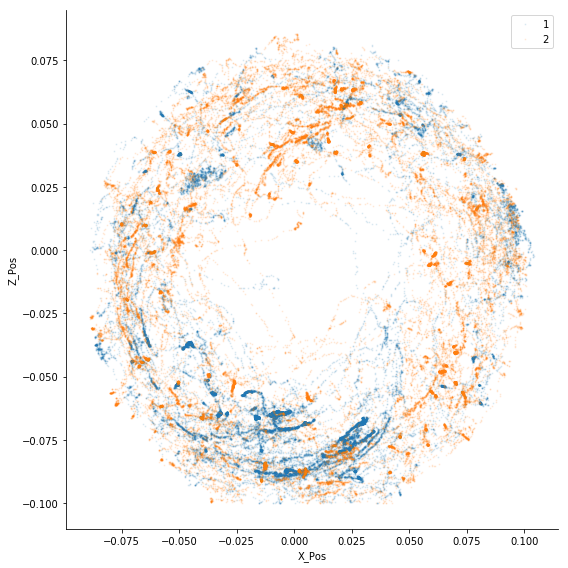

In [23]:
g = sns.FacetGrid(data=rat2.sample(100000), size=8, hue='session_id')
g.map(plt.scatter,'X_Pos','Z_Pos', s=0.9, alpha=0.1);
plt.legend();

## 3. Undersampling

## We got better results, but the choice of the two hyperparameters strongly depeneds on the Dataset!

# Heatmaps

In [24]:
from matplotlib import colors

def make_heatmap(x, y, bins=20, cmap='viridis', **kwargs):
    hist = np.histogram2d(x, y, bins=bins)[0]
    return plt.imshow(hist, cmap=cmap, origin='lower')

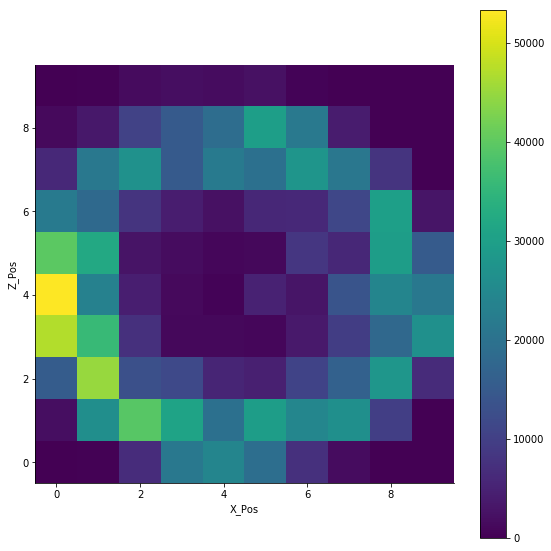

In [28]:
g = sns.FacetGrid(data=dfrat, size=8)
g.map(make_heatmap,'X_Pos','Z_Pos', bins=10);
plt.colorbar();

# 4. Undersaturation

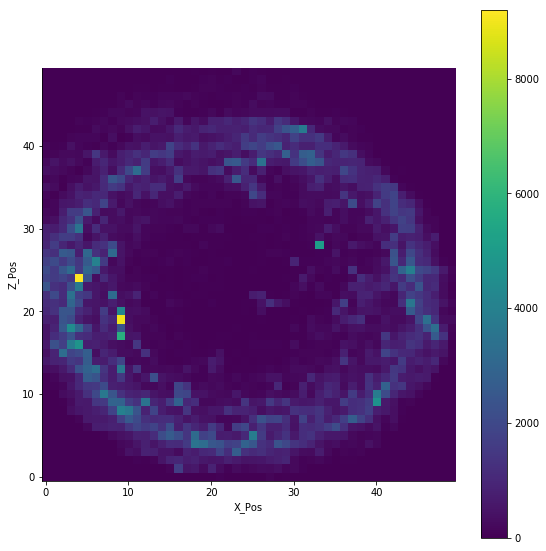

In [32]:
g = sns.FacetGrid(data=dfrat, size=8)
g.map(make_heatmap,'X_Pos','Z_Pos', bins=50);
plt.colorbar()

# Color Pallete
https://seaborn.pydata.org/tutorial/color_palettes.html
<img src="./images/fire_rainbow.png"  width="500" height="500"/>


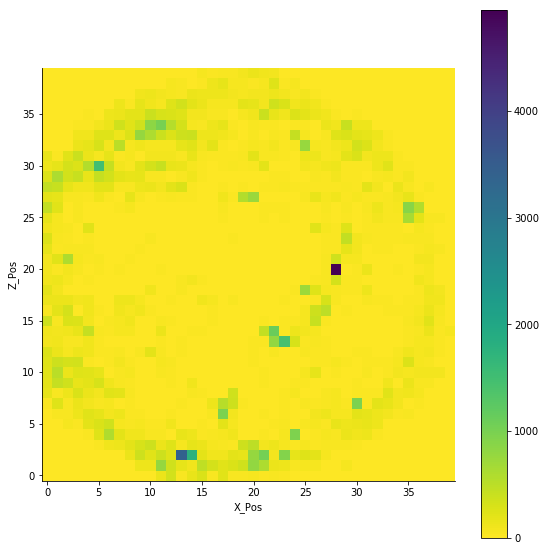

In [36]:
# viridis_r, rainbow, icefire_r
g = sns.FacetGrid(data=rat, size=8);
g.map(make_heatmap,'X_Pos','Z_Pos', cmap='viridis_r', bins=40);
plt.colorbar()

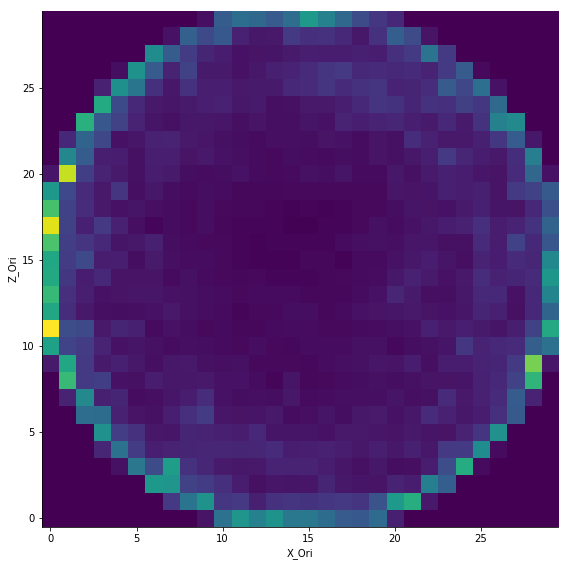

In [37]:
g = sns.FacetGrid(data=dfrat, size=8)
g.map(make_heatmap,'X_Ori','Z_Ori', bins=30);

# Taking it a step further!

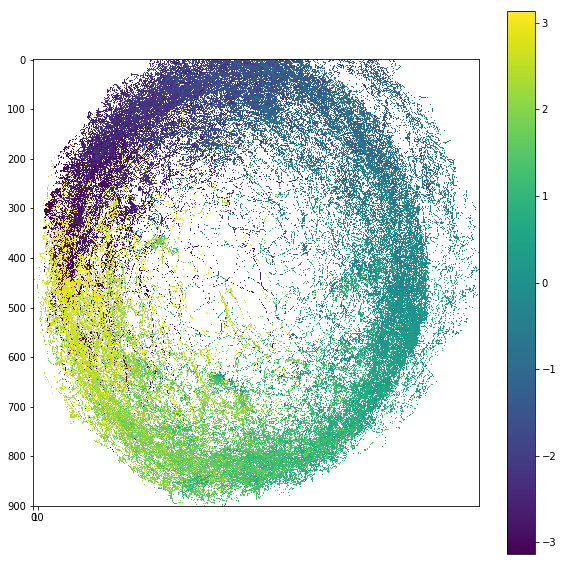

In [38]:
cvs = ds.Canvas(plot_height=900, plot_width=900)
agg_z =cvs.points(source=dfrat, x='X_Pos', y='Z_Pos', agg=ds.mean('Z_Ori'))
agg_x =cvs.points(source=dfrat, x='X_Pos', y='Z_Pos', agg=ds.mean('X_Ori'))
agg_xn = agg_x / np.sqrt(agg_x ** 2 + agg_z ** 2)
agg_zn = agg_z / np.sqrt(agg_x ** 2 + agg_z ** 2)
theta = np.arctan2(agg_zn, agg_xn)
cm.hsv.set_bad('black')
plt.figure(figsize=(10, 10))
plt.imshow(theta)
plt.xticks([0, 10])
plt.colorbar();

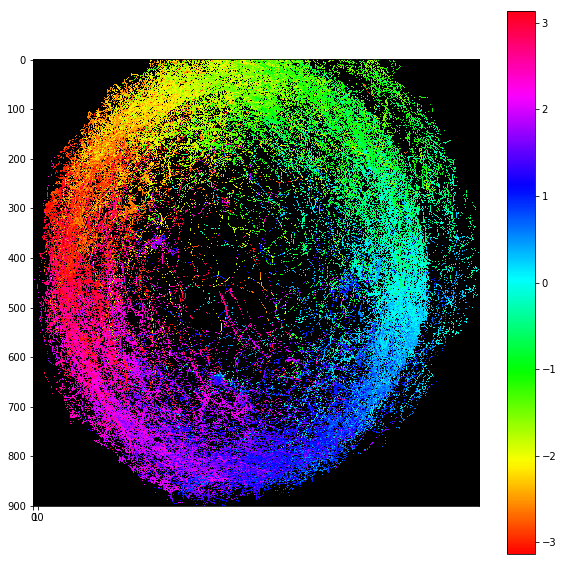

In [39]:
cvs = ds.Canvas(plot_height=900, plot_width=900)
agg_z =cvs.points(source=dfrat, x='X_Pos', y='Z_Pos', agg=ds.mean('Z_Ori'))
agg_x =cvs.points(source=dfrat, x='X_Pos', y='Z_Pos', agg=ds.mean('X_Ori'))
agg_xn = agg_x / np.sqrt(agg_x ** 2 + agg_z ** 2)
agg_zn = agg_z / np.sqrt(agg_x ** 2 + agg_z ** 2)
theta = np.arctan2(agg_zn, agg_xn)
cm.hsv.set_bad('black')
plt.figure(figsize=(10, 10))
plt.imshow(theta)
plt.imshow(theta, cmap=cm.hsv)
plt.xticks([0, 10])
plt.colorbar();

<img src='./images/1.png'  width="1000" height="1000" align="center"/>

# Summary:
## What should we keep in mind, when working with big datasets:
### Scatter plots - 3 hyperparameters:
- overplotting  - avoid obsccuring the data
- saturation    - 10, 100, 6000 points under 10 points limit
- undersampling - taking a subset might not be an answer

### Heatmaps - 1 hyperparameter:
- undersaturation 
- pick the color map in accordance to the 


# Extra Examples

## Ratcave Arena
<img src='./images/rat_control.png'  width="900" height="900" align="center"/>

## Color Rearing
<img src='./images/color_rearing.png'  width="1000" height="1000" align="center"/>

# Thank you for your attention!

<img src="./images/pydata.png"  width="600" height="600"/>

<img src="./images/lmulogo3.png"  width="500" height="500"/>